In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Spring Problem

From the equation `x'' = -k/m*x`; `x' = -Awcos(wt)` and `x(0) = x0`

In [2]:
def spring(t,curr):
    x, v = curr
    return v, -k/m*x

## Different algorithm

With the same conditions, we'll vary the algorithm the `solve_ivp` function is using.

In [3]:
k=0.1
m=5
x0 = 5
v0 = -1
initv = [x0,v0]

Solving as usual but with all the algorithms tried on

In [10]:
sol1 = solve_ivp(spring, [0, 1000], initv, method='RK45')
sol2 = solve_ivp(spring, [0, 100], initv, method='RK23')
sol3 = solve_ivp(spring, [0, 100], initv, method='Radau')
sol4 = solve_ivp(spring, [0, 100], initv, method='BDF')
sol5 = solve_ivp(spring, [0, 100], initv, method='LSODA')

Visualizing the result

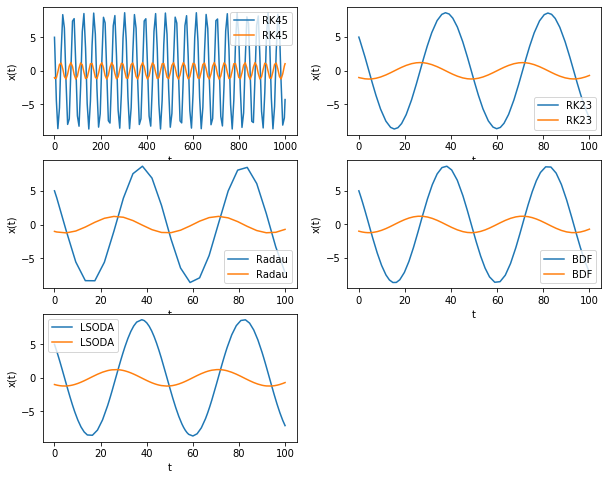

In [11]:
f = plt.figure(figsize=(10,8))
f.add_subplot(3,2,1)
plt.plot(sol1.t,sol1.y[0], label='RK45')
plt.plot(sol1.t,sol1.y[1], label='RK45')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
f.add_subplot(3,2,2)
plt.plot(sol2.t,sol2.y[0], label='RK23')
plt.plot(sol2.t,sol2.y[1], label='RK23')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
f.add_subplot(3,2,3)
plt.plot(sol3.t,sol3.y[0], label='Radau')
plt.plot(sol3.t,sol3.y[1], label='Radau')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
f.add_subplot(3,2,4)
plt.plot(sol4.t,sol4.y[0], label='BDF')
plt.plot(sol4.t,sol4.y[1], label='BDF')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
f.add_subplot(3,2,5)
plt.plot(sol5.t,sol5.y[0], label='LSODA')
plt.plot(sol5.t,sol5.y[1], label='LSODA')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

## For RK45

The total energy is given by E = PE + KE where:
- PE = 1/2 * kx^2
- KE = 1/2 * mx^2
E should be a constant and that value will be determined solely using initial PE and KE

In [12]:
def pe(x):
    return 1/2 * k*x**2
def ke(v):
    return 1/2 * m*v**2

def e(x,v):
    return pe(x) +ke(v)

Total Energy: 3.75
Accuracy of this method: 8.82626162215645e-05


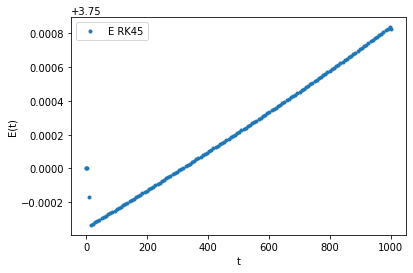

In [13]:
# Calculating PE, and also total E
#pe1 = pe(sol1.y[0])
#ke1 = ke(sol1.y[1])
e1 = e(sol1.y[0], sol1.y[1])

# Calculating the exact total E
e1_0 = e(sol1.y[0][0], sol1.y[1][0])

print('Total Energy:',e1_0)
print('Accuracy of this method:', np.average(abs(e1-e1_0))/e1_0)    # Accuracy is measured using

#plt.plot(sol1.t, pe1, label='PE RK45')
#plt.plot(sol1.t, ke1, label='KE RK45')
plt.plot(sol1.t, e1, '.',label='E RK45')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()

## For RK Methods

Making a function that does everything on top

In [54]:
def calc_error(sol):
    # Calculating PE, and also total E
    e1 = e(sol.y[0], sol.y[1])
    # Calculating the exact total E
    e1_0 = e(sol.y[0][0], sol.y[1][0])
    # Calculate the accuracy by average of differences
    accuracy = np.average(abs(e1-e1_0))/e1_0
    return accuracy, e1_0

Calculating the error of using Runge-Kutta method of order 5 and 3 gives

In [55]:
A1, E1 = calc_error(sol1)
A2, E2 = calc_error(sol2)
print('RK45 Total E:', E1, 'with accuracy:', A1)
print('RK23 Total E:', E2, 'with accuracy:', A2)

RK45 Total E: 3.75 with accuracy: 6.156087734000272e-05
RK23 Total E: 3.75 with accuracy: 0.011243008640211266


Clearly, a higher degree of method gives better precision. RK45 has better accuracy than RK23.

## For Adaptive

There are `rtol` and `atol` parameters short for *"relative tolerance"* and *"absolute tolerance"*.
- `rtol` controls number of correct digits
- `atol` controls the error if the value of the function is below atol (which will not guarantee rtol anymore)
This will keep the error to be less than the value of absolute tolerance and the relative error:
- error < Absolute_Error + Relactive_Error(Value of the function)

In [72]:
sol3 = solve_ivp(spring, [0, 100], initv, method='Radau', rtol=1, atol=0.01)
sol4 = solve_ivp(spring, [0, 100], initv, method='BDF', rtol=0.1, atol=1e-9)

In [73]:
A3, E3 = calc_error(sol3)
A4, E4 = calc_error(sol4)
print('Radau Total E:', E3, 'with accuracy:', A3)
print('BDF Total E:', E4, 'with accuracy:', A4)

Radau Total E: 3.75 with accuracy: 0.2928312206385693
BDF Total E: 3.75 with accuracy: 0.32111755105377554


We can use `rtol` to adjust relative error and then `atol` to adjust if function is below `atol`